In [1]:
#import dependencies
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine , desc
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import func

sns.set()

In [2]:
# Create an engine to a SQLite database file called `hawaii.sqlite`
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [3]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [4]:
# map station class
Station = Base.classes.station
# map measurement class
Measurement = Base.classes.measurement

In [5]:
# create a session
session = Session(engine)

### Precipitation Analysis

Plot with the last 12 months of precipitation data

In [6]:
#get the date a year from today
today = dt.date.today()
ayear =  dt.timedelta(days=365)
year_ago = (today - ayear).isoformat()

In [7]:
prec_per_date = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > year_ago).all()
prec_per_date_df = pd.DataFrame(prec_per_date)
prec_per_date_df.set_index('date', inplace=True)
prec_per_date_df.head()

,prcp
date,
2017-04-06,0.0
2017-04-07,0.0
2017-04-08,0.0
2017-04-09,0.0
2017-04-10,0.0


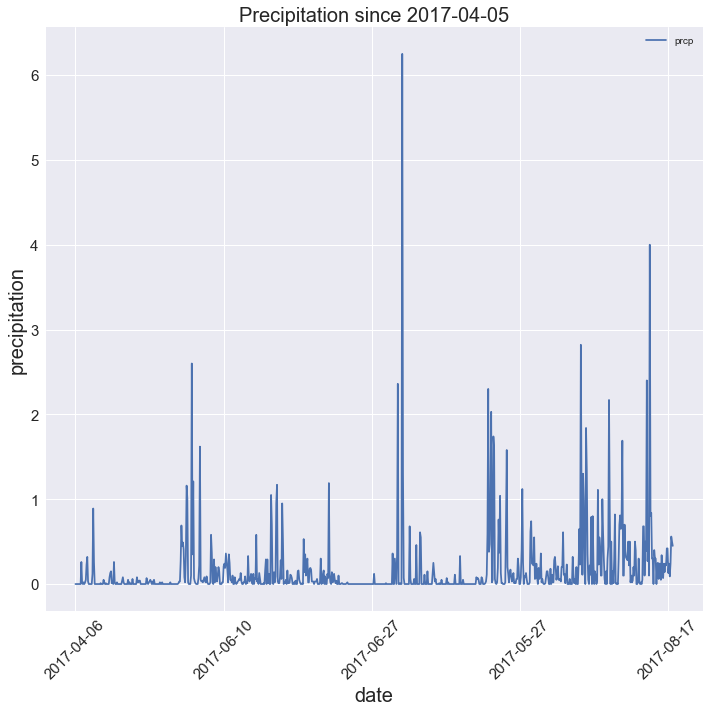

In [13]:
#We have too many measurments in the last year. This will make the x axis unreadable. Let's pick a few ticks to show
xticks_locations = [0,200,400,600,800]
#Now lets plot the precipitation values for the last year
ax = prec_per_date_df.plot(kind='line',  figsize=(10,10),  fontsize=15 )
ax.set_title(f'Precipitation since {year_ago}',fontsize= 20)
ax.set_xlabel('date',fontsize = 20) 
ax.set_ylabel('precipitation', fontsize = 20)
ax.set_xticklabels(prec_per_date_df.index, rotation=45)
ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(xticks_locations))
ax.xaxis.set_major_formatter(matplotlib.ticker.IndexFormatter(prec_per_date_df.index))
plt.tight_layout()
plt.show()

In [12]:
prec_per_date_df.describe()

,prcp
count,807.000000
mean,0.162249
std,0.420123
min,0.000000
25%,0.000000
50%,0.020000
75%,0.135000
max,6.250000


### Station Analysis

In [14]:
# total number of stations.
total_stations = session.query(Station.station).all()
print(f'Total number of stations: {len(total_stations)}')

Total number of stations: 9


In [15]:
# most active stations.
selections = [Measurement.station, func.count(Measurement.station)]
active_stations = session.query(*selections).group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()
print(active_stations)
print(f'\n\nThe station with highest number of temperature observations is: {active_stations[0][0]}')

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


The station with highest number of temperature observations is: USC00519281


In [17]:
#Get all the temperature measurements for the most active stations for the past year
tobs_query = session.query(Measurement.tobs)\
        .filter(Measurement.date > year_ago).filter(Measurement.station == 'USC00519281').all()

In [18]:
tobs_query = np.array(tobs_query)

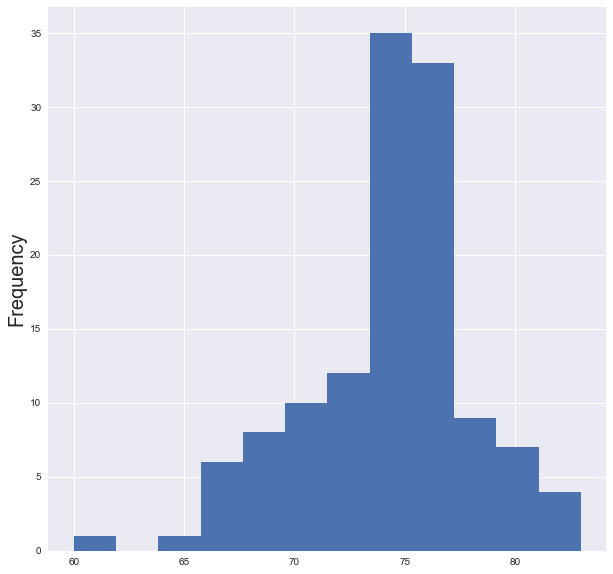

<Figure size 432x288 with 0 Axes>

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(tobs_query, bins=12)
plt.ylabel('Frequency', fontsize = 20)
plt.show()
plt.tight_layout()

### Temperature Analysis

In [22]:
def calc_temps(init_date, final_date):
    '''
    accept: a start date and end date in the format %Y-%m-%d
    return: the minimum, average, and maximum temperatures for that range of dates
    '''
    tobs_query = session.query(Measurement.tobs)\
        .filter(Measurement.date > init_date).filter(Measurement.date < final_date).all()
    return np.min(tobs_query), np.max(tobs_query), np.mean(tobs_query)

In [23]:
tmin, tmax, tmean = calc_temps('2017-04-04', '2017-04-20')
print(tmin, tmax, tmean)

67 83 73.74736842105263


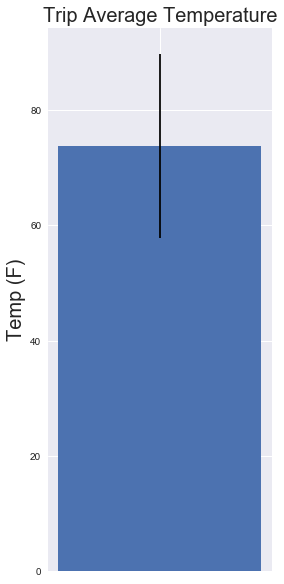

<Figure size 432x288 with 0 Axes>

In [25]:
fig, ax = plt.subplots(figsize=(4,10))
indx = [0]
ax.bar(indx, tmean, yerr= [tmax - tmin])
plt.xticks(indx, (''))
plt.title('Trip Average Temperature', fontsize=20)
plt.ylabel('Temp (F)', fontsize=20)
plt.show()
plt.tight_layout()

### Rainfall per weather station

In [26]:
selections = [Measurement.station, func.sum(Measurement.prcp)]
rainfall = session.query(*selections).filter(Measurement.date > '2017-04-04' ).group_by(Measurement.station).all()
rainfall

[('USC00513117', 18.489999999999988),
 ('USC00514830', 13.254999999999988),
 ('USC00516128', 53.04000000000005),
 ('USC00517948', 0.13),
 ('USC00519281', 27.439999999999984),
 ('USC00519397', 3.809999999999998),
 ('USC00519523', 15.430000000000005)]